In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import six.moves.urllib as urllib
import sys
import tarfile
import zipfile
from collections import defaultdict
from io import StringIO
from PIL import Image
import tensorflow as tf
import cv2

C:\Users\Hard Parikh\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hard Parikh\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hard Parikh\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hard Parikh\Anaconda3\envs\tf_gpu\lib\site-

In [2]:
sys.path.append(r"C:\Users\Hard Parikh\Anaconda3\envs\tf_gpu\Lib\site-packages\object_recognition_detection")

In [3]:
from object_recognition_detection.utils import ops as utils_ops
from utils import label_map_util
from utils import visualization_utils as vis_util

In [4]:
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [5]:
MODEL_NAME='ssd_mobilenet_v1_coco_2018_01_28'
MODEL_FILE=MODEL_NAME+'.tar.gz'
DOWNLOAD_BASE="http://download.tensorflow.org/models/object_detection/"
NUM_CLASSES=90
PATH_TO_CKPT=MODEL_NAME+'/frozen_inference_graph.pb'
PATH_TO_LABELS=os.path.join('data','mscoco_label_map.pbtxt')

In [6]:
if not os.path.exists(MODEL_NAME+'/frozen_inference_graph.pb'):
    print("Downloading COCO model")
    opener=urllib.request.URLopener()
    opener.retrieve(DOWNLOAD_BASE+MODEL_FILE,MODEL_FILE)
    tar_file=tarfile.open(MODEL_FILE)
    for file in tar_file.getmembers():
        file_name=os.path.basename(file.name)
        if '/frozen_inference_graph.pb' in file_name:
            tar_file.extract(file,os.getcwd())
    print("Downloading completed")
else:
    print("COCO model already exists")

COCO model already exists


In [7]:
detection_graph=tf.Graph()
with detection_graph.as_default():
    od_graph_def=tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT,'rb') as fid:
        serialized_graph=fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def,name='')

In [8]:
label_map=label_map_util.load_labelmap(r"C:\Users\Hard Parikh\Anaconda3\envs\tf_gpu\Lib\site-packages\object_recognition_detection\data\mscoco_label_map.pbtxt")

In [9]:
catergories=label_map_util.convert_label_map_to_categories(label_map,max_num_classes=NUM_CLASSES,use_display_name=True)

In [10]:
category_index=label_map_util.create_category_index(catergories)

In [11]:
def load_image_into_numpy_array(image):
    (im_width,im_height)=image.size
    return np.array(image.getdata()).reshape((im_height,im_width,3)).astype(np.uint8)

In [16]:
# TEST_IMAGE_PATH=r"C:\Users\Hard Parikh\Anaconda3\envs\tf_gpu\Lib\site-packages\object_recognition_detection\test_images\image2.jpg"
# x=load_image_into_numpy_array(Image.open(TEST_IMAGE_PATH))

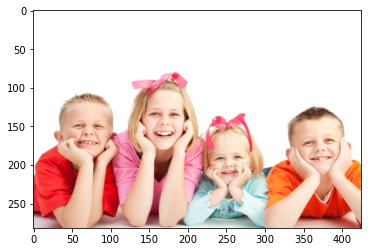

In [17]:
# plt.imshow(x)

In [22]:
PATH_TO_TEST_IMAGES_DIR=r"C:\Users\Hard Parikh\Anaconda3\envs\tf_gpu\Lib\site-packages\object_recognition_detection\test_images"

In [23]:
TEST_IMAGE_PATH=[os.path.join(PATH_TO_TEST_IMAGES_DIR,'image{}.jpg'.format(2))]

In [24]:
TEST_IMAGE_PATH

['C:\\Users\\Hard Parikh\\Anaconda3\\envs\\tf_gpu\\Lib\\site-packages\\object_recognition_detection\\test_images\\image2.jpg']

In [25]:
IMAGE_SIZE=(12,8)

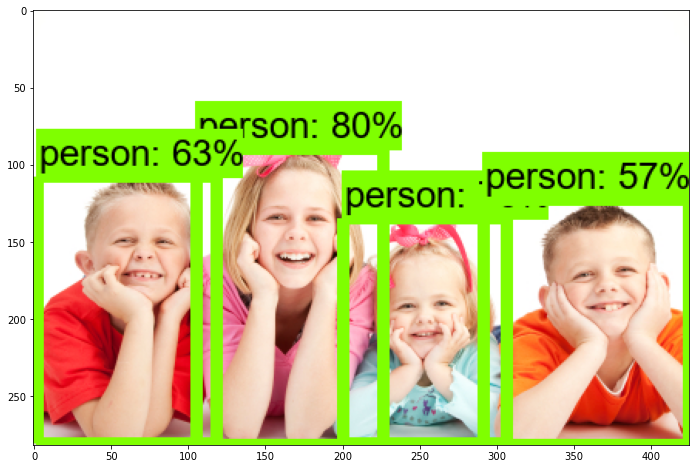

In [26]:
pixels=[]
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for image_path in TEST_IMAGE_PATH:
            image=Image.open(image_path)
            image_np=load_image_into_numpy_array(image)
            pixels.append(image_np)
            image_np_expanded=np.expand_dims(image_np,axis=0)
            image_tensor=detection_graph.get_tensor_by_name('image_tensor:0')
            boxes=detection_graph.get_tensor_by_name('detection_boxes:0')
            scores=detection_graph.get_tensor_by_name('detection_scores:0')
            classes=detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections=detection_graph.get_tensor_by_name('num_detections:0')
            
            (boxes,scores,classes,num_detections)=sess.run([boxes,scores,classes,num_detections],
                                                          feed_dict={image_tensor:image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(image_np,np.squeeze(boxes),np.squeeze(classes).astype(np.int32),np.squeeze(scores),category_index,use_normalized_coordinates=True,line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()

In [28]:
def detection():
    cap=cv2.VideoCapture(0)
    nu_de=[]
    with detection_graph.as_default():
        with tf.Session(graph=detection_graph) as sess:
            for image_path in TEST_IMAGE_PATH:
                while(True):
                    ret,frame=cap.read()
                    image_np=frame
                    image_np_expanded=np.expand_dims(image_np,axis=0)
                    image_tensor=detection_graph.get_tensor_by_name('image_tensor:0')
                    boxes=detection_graph.get_tensor_by_name('detection_boxes:0')
                    scores=detection_graph.get_tensor_by_name('detection_scores:0')
                    classes=detection_graph.get_tensor_by_name('detection_classes:0')
                    num_detections=detection_graph.get_tensor_by_name('num_detections:0')
                    nu_de.append(num_detections)
                    (boxes,scores,classes,num_detections)=sess.run([boxes,scores,classes,num_detections],feed_dict={image_tensor:image_np_expanded})
                    vis_util.visualize_boxes_and_labels_on_image_array(image_np,np.squeeze(boxes),np.squeeze(classes).astype(np.int32),np.squeeze(scores),category_index,use_normalized_coordinates=True,line_thickness=8)
                    cv2.imshow('Frame',image_np)
                    if(cv2.waitKey(1) & 0xFF==ord('q')):
                        break
                cap.release()
                cv2.destroyAllWindows()
                break

In [29]:
detection()